# Analysis

In [24]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import Data

In [2]:
# Your data file must be located in the folder named 'data'

filename = input("What file do you want to plot? ")
path_to_file = "../data/"
path = path_to_file + filename

print("\nFile Path: \n\t" + path)

raw = mne.io.read_raw_fif(path, preload=True, verbose=0)

data = raw.get_data()

What file do you want to plot? BCIproject_trial-75_raw.fif.gz

File Path: 
	../data/BCIproject_trial-75_raw.fif.gz


## Verify Sample Rate

In [25]:
# Numerical Values Only

start_time = float(input("Copy and paste the experiment 'Start Time' from the terminal: "))
end_time = float(input("Copy and paste the experiment 'End Time' from the terminal: "))
expected_sample_rate = float(input("What is the sample rate (Hz) you expect? "))

Copy and paste the experiment 'Start Time' from the terminal: 0
Copy and paste the experiment 'End Time' from the terminal: 3
What is the sample rate (Hz) you expect? 150


In [31]:
num_samples = np.shape(data)[1]
recording_time = end_time - start_time
actual_sample_rate = num_samples / recording_time

print("The Actual Sample Rate is: " + str(actual_sample_rate))

if actual_sample_rate != expected_sample_rate:
    print("The Actual Sample Rate is not what it should be")
    if abs(actual_sample_rate - expected_sample_rate) < (expected_sample_rate * 0.05):
        print("\tbut the Actual Sample Rate is off by less than 5%")

The Actual Sample Rate is: 2310.3333333333335
The Actual Sample Rate is not what it should be


## Simple Plot

### Plot Data

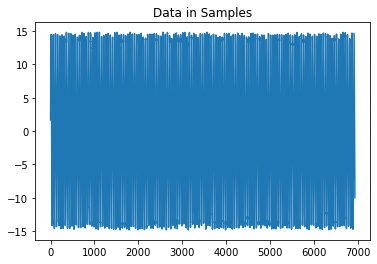

In [3]:
X = np.linspace(0, np.shape(data)[1], np.shape(data)[1])
Y = data[0]

plt.plot(X, Y)
plt.title("Data in Samples");

## Frequency Analysis

### Get PSD Values

In [4]:
psds, freqs = mne.time_frequency.psd_welch(raw, fmax=300)

Effective window size : 1.024 (s)


In [5]:
pd.DataFrame(np.transpose(psds), freqs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0.000000,0.030899,0.104288,0.183326,0.259748,0.271003,0.150504,0.333031,0.222995,0.620362,1.068558,2.117229,1.956751,2.921516,3.656692,4.661447,5.475696
0.976562,0.022645,0.099721,0.225215,0.377657,0.585674,0.825344,2.306577,2.039662,3.827224,7.269668,10.758348,11.763133,18.450206,23.468986,27.180904,29.329712
1.953125,0.001827,0.015625,0.085804,0.184896,0.404646,0.988707,1.986666,2.851361,4.230564,7.139431,9.844813,12.475383,18.109858,27.610634,28.360142,36.252456
2.929688,0.003100,0.019416,0.065982,0.199773,0.349805,1.003212,1.158155,2.971583,4.771378,6.184550,9.751241,13.848790,18.469758,27.386290,41.127131,44.791099
3.906250,8.425315,0.019586,0.074714,0.193131,0.502164,1.146553,1.768913,2.895386,5.499489,8.405142,9.970199,17.160183,24.908029,27.750944,40.079250,47.709237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121.093750,0.000601,0.010473,0.053405,0.156493,0.473550,0.643127,1.682575,2.549428,5.869720,8.026111,10.058648,15.671052,16.900632,27.719048,29.486397,51.988026
122.070312,0.000509,0.010675,0.065769,0.151300,0.412218,0.716789,1.522359,2.876158,3.984958,5.332374,12.655551,11.084282,18.388191,37.942031,42.830790,40.801525
123.046875,0.000434,0.010494,0.053706,0.164843,0.500221,0.999118,1.743873,2.229665,3.324316,6.189185,13.397811,11.121846,16.535995,42.258936,44.517006,37.334182
124.023438,0.000410,0.010664,0.068230,0.176007,0.572112,0.778820,1.432988,2.320984,4.190504,4.497349,9.188602,11.447433,19.950196,31.546641,26.007519,40.870221


## Plot

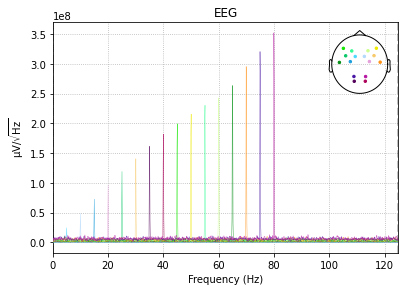

In [7]:
fig1 = raw.plot_psd(dB=False, fmax=125); # this plot does not use the values created above - may differ in y-scale